Gefundene Personen: 7


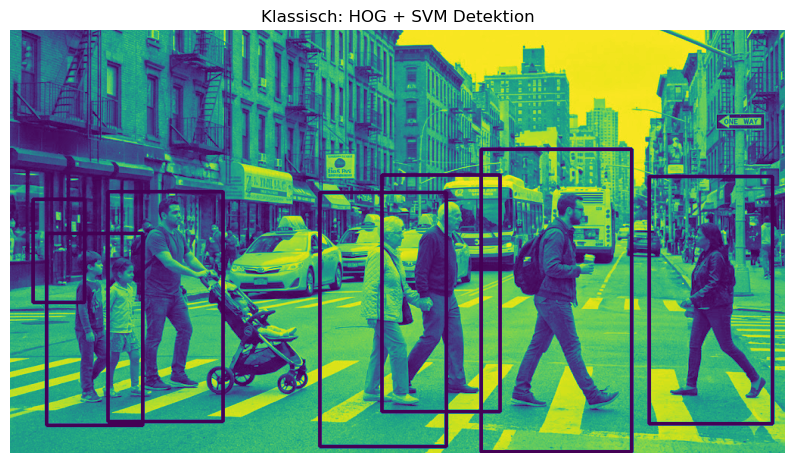

In [14]:
# Der "alte" HOG-Detektor

import cv2
import matplotlib.pyplot as plt

# 1. Bild laden (Bibliothek)
img_gray = cv2.imread('Street.jpg', cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.imread('library.jpg', cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.imread('beatles.jpg', cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.imread('Grasshopper.png', cv2.IMREAD_GRAYSCALE)

# 2. HOG Deskriptor & Detektor initialisieren (Vortrainiert von OpenCV)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 3. Sliding Window Detection (passiert intern in detectMultiScale)
# winStride: Wie weit springt das Fenster? (Größer = Schneller, aber ungenauer)
# scale: Wie stark wird das Bild skaliert für die Pyramide?
found_boxes, weights = hog.detectMultiScale(img_gray, winStride=(8,8), padding=(32,32), scale=1.05)

print(f"Gefundene Personen: {len(found_boxes)}")

# 4. Boxen zeichnen
img_result = img_gray.copy()
for (x, y, w, h) in found_boxes:
    cv2.rectangle(img_result, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.figure(figsize=(10, 6))
plt.imshow(img_result)
plt.title("Klassisch: HOG + SVM Detektion")
plt.axis("off")
plt.show()

# DISKUSSION:
# Seht ihr Fehler? (False Positives, übersehene Personen?)
# Wie lange hat es gedauert im Vergleich zu YOLO?